<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pygam
!pip install pytimetk

In [4]:
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
# Чтение файла Excel
df = pd.read_excel('/content/Сыр плавленый Карат Дружба Ванночки 400 г 45,0%.xlsx')

df_all = pd.read_excel('/content/df_Сыр плавленый Карат Дружба Ванночки 400 г 45,0%.xlsx')
# Вывод первых нескольких строк DataFrame

[  0.    14.32  28.64  42.96  57.28  71.6   85.92 100.24 114.56 128.88
 143.2 ]


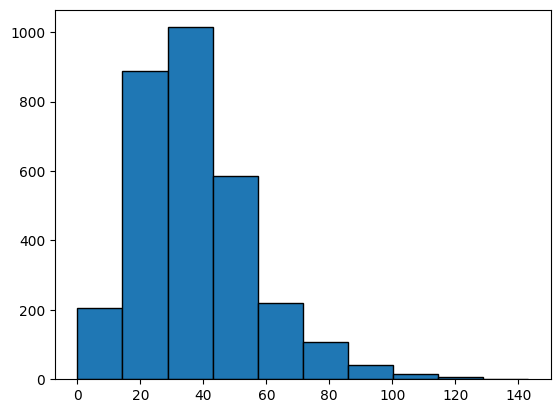

In [5]:


counts, bin_edges, _ = plt.hist(df["SALES VOL"], bins=10, edgecolor='black')
print(bin_edges)


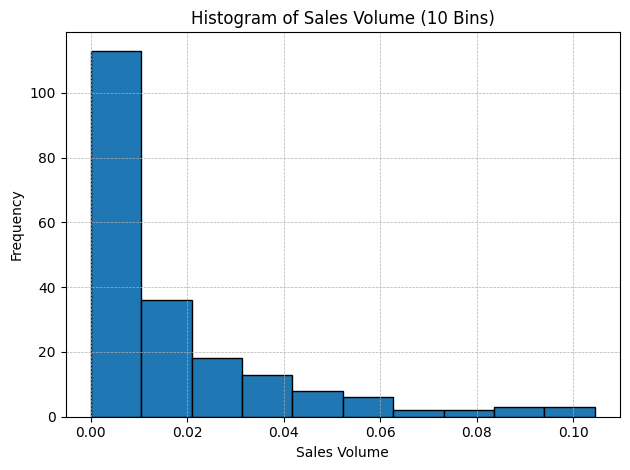

Интервалы бинов share vol 0.0 0.03132477702849684
количево код тт 22
['36VN', '37UY', '4699', 'G273', 'Q618', '333W', '9037', 'X852', '38G3', 'S554']


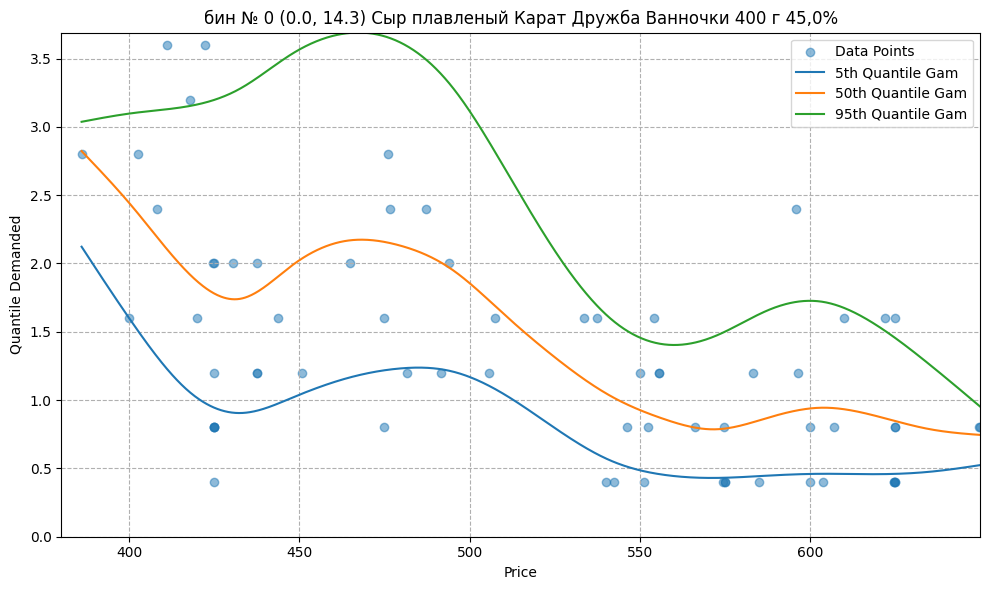

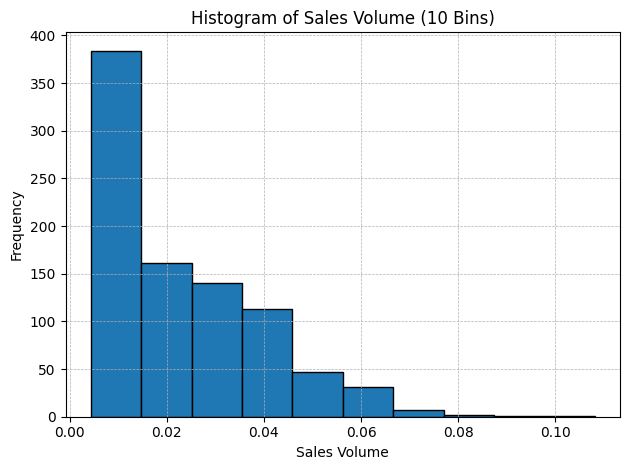

Интервалы бинов share vol 0.004381869759111805 0.03550589367440207
количево код тт 237
['G674', 'D452', 'G686', 'H973', '36DX', 'E417', '36ZX', '5080', 'X895', '5341']


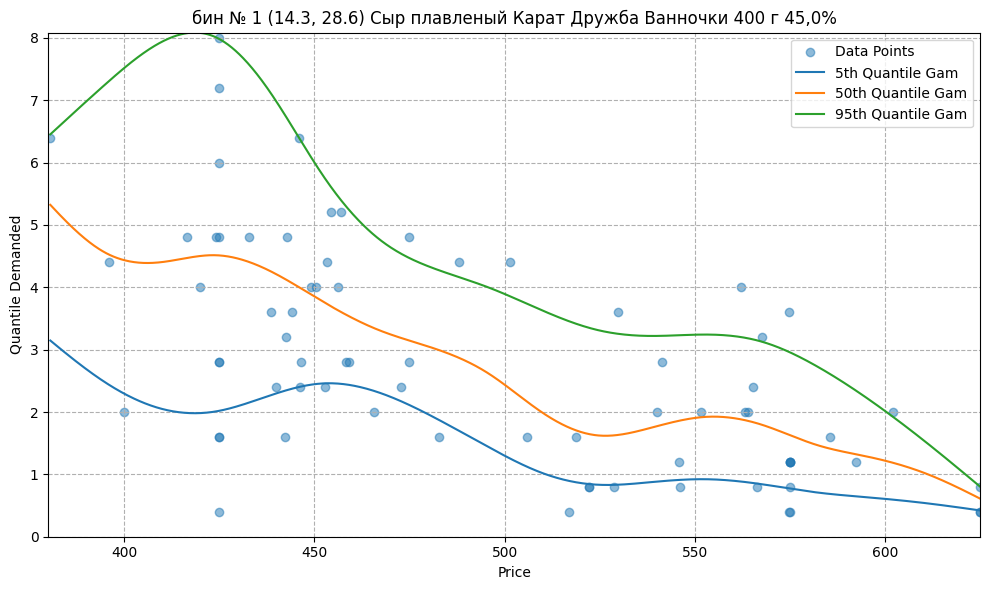

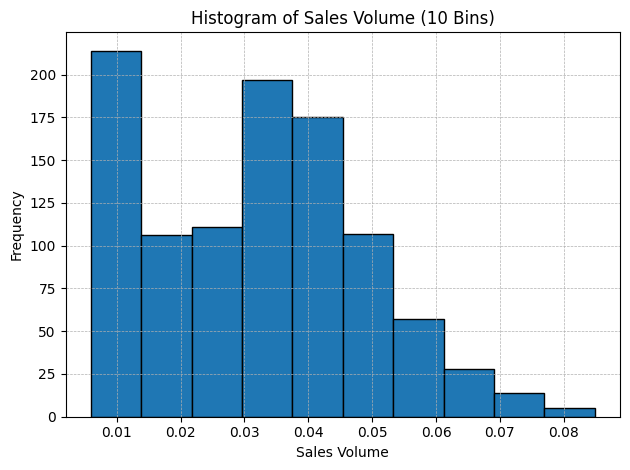

Интервалы бинов share vol 0.021735070295324288 0.04540790466704824
количево код тт 480
['5288', '4081', 'J405', 'Y818', '35KK', '348S', '4222', 'O029', '30J4', 'E061']


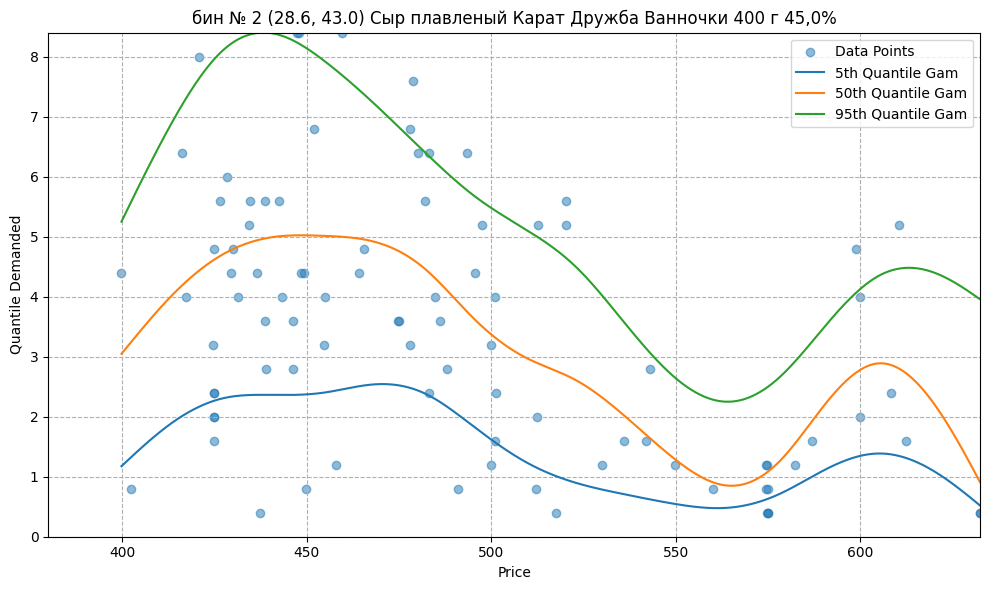

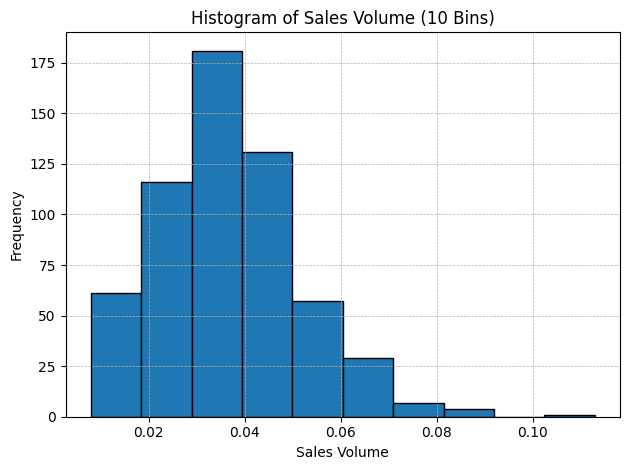

Интервалы бинов share vol 0.01847196114422682 0.04994943847578018
количево код тт 424
['9637', '3638', '350L', 'X954', 'S307', '4394', 'Y164', 'H655', '35PB', 'O674']


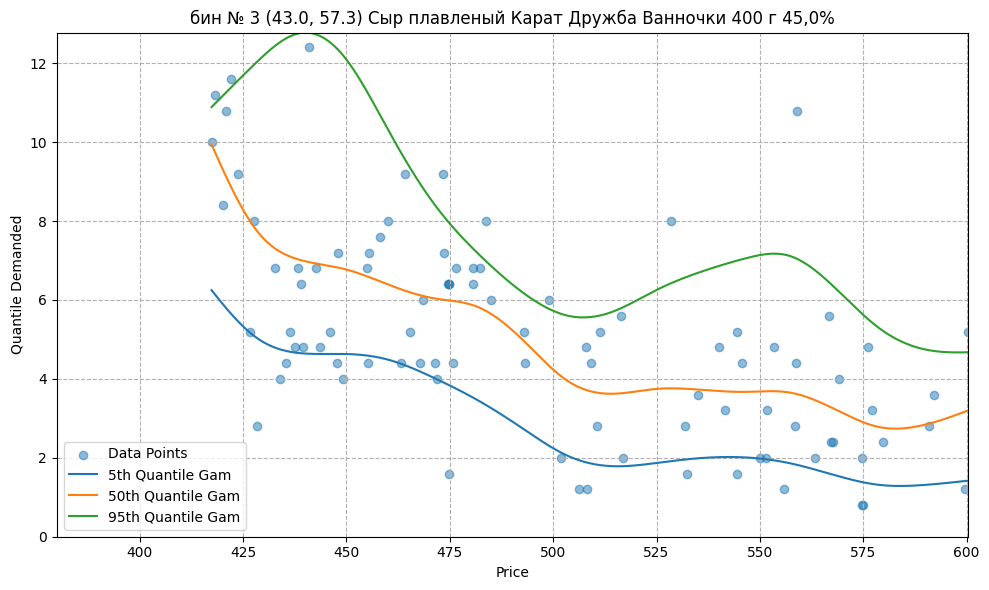

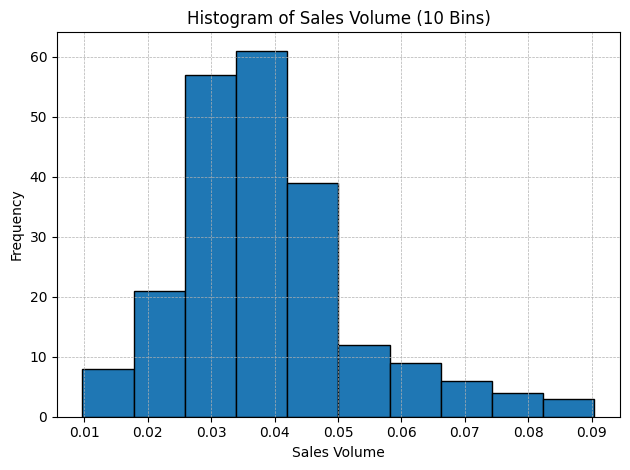

Интервалы бинов share vol 0.02586992649725122 0.0500726278748981
количево код тт 157
['X970', '30VW', 'O407', '35YD', '36TR', '4395', 'G433', 'O434', 'O616', '30M4']


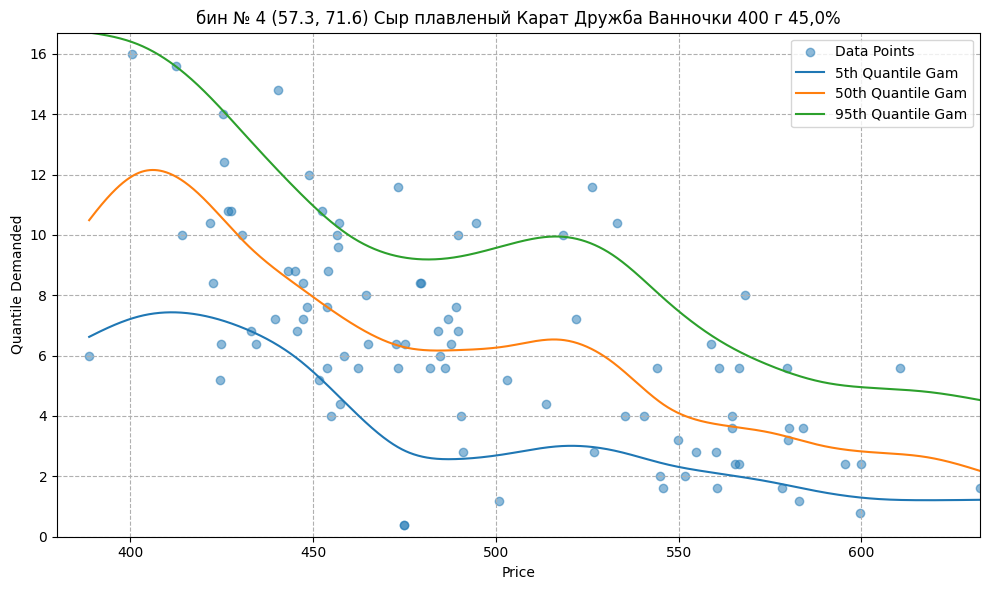

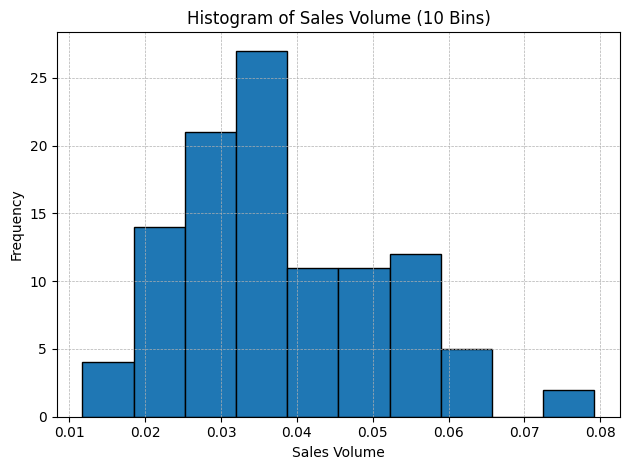

Интервалы бинов share vol 0.025222336245532086 0.045480776375343104
количево код тт 59
['G060', 'G153', '34YK', 'Q144', '9180', '8899', 'S234', 'O435', '8446', '3898']


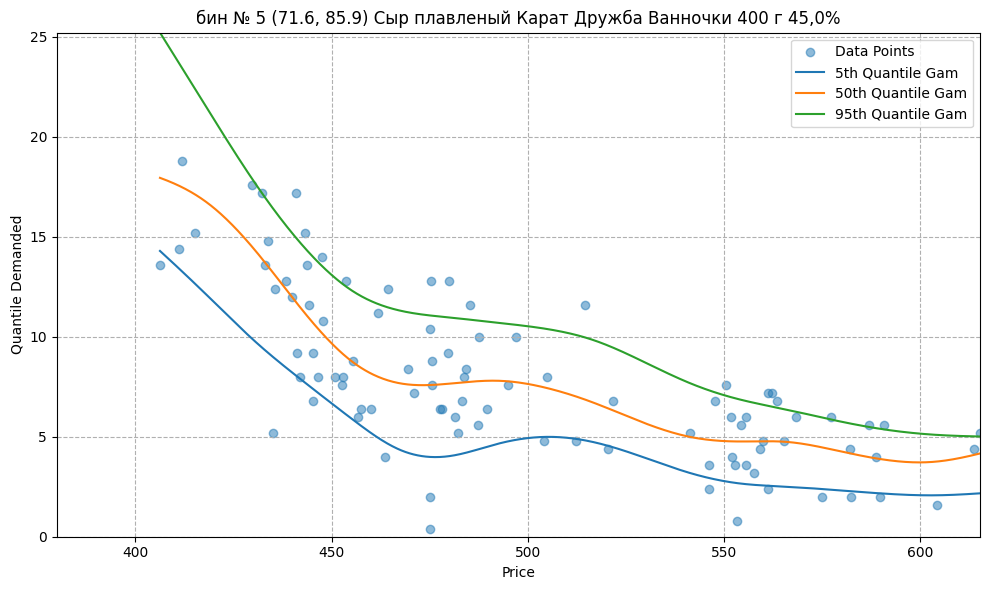

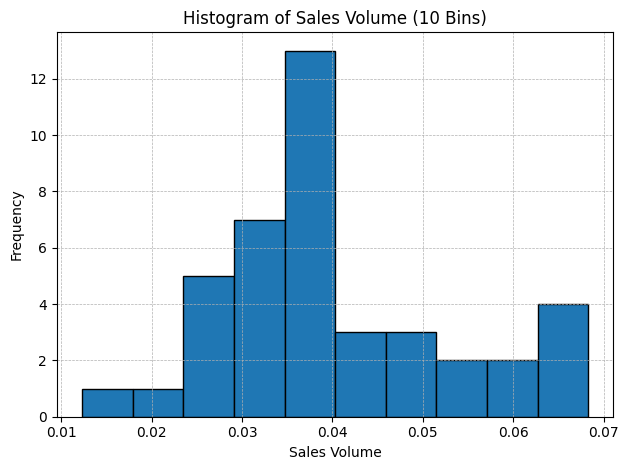

Интервалы бинов share vol 0.02910645583588618 0.04590038791595413
количево код тт 23
['7625', '9632', '9321', '4229', 'Q752', 'G548', 'D440', 'J162', '8245', '9494']


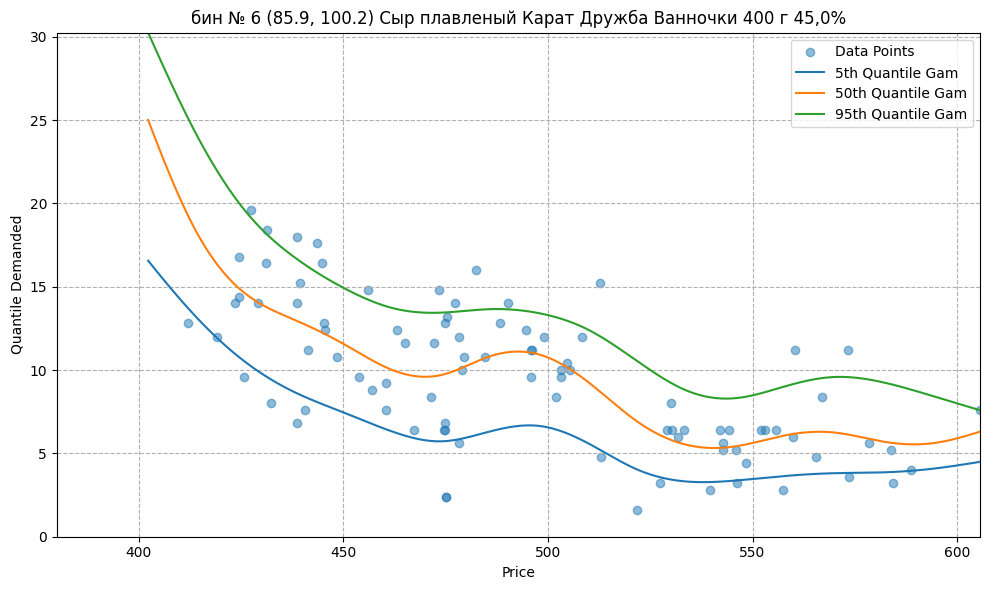

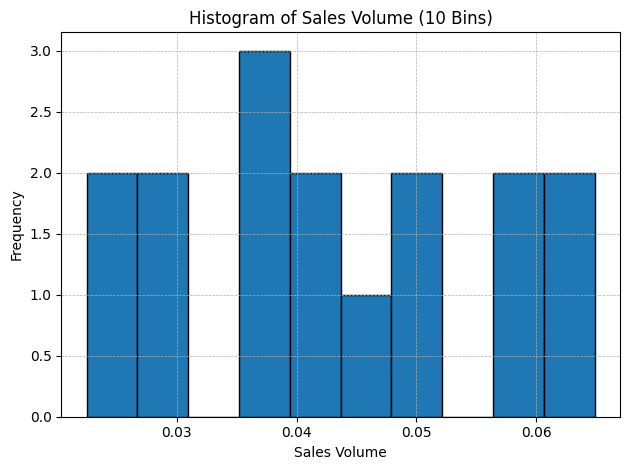

Интервалы бинов share vol 0.030969770490102595 0.04368007959569667
количево код тт 5
['3513', '3847', '8112', '9558', 'S633']


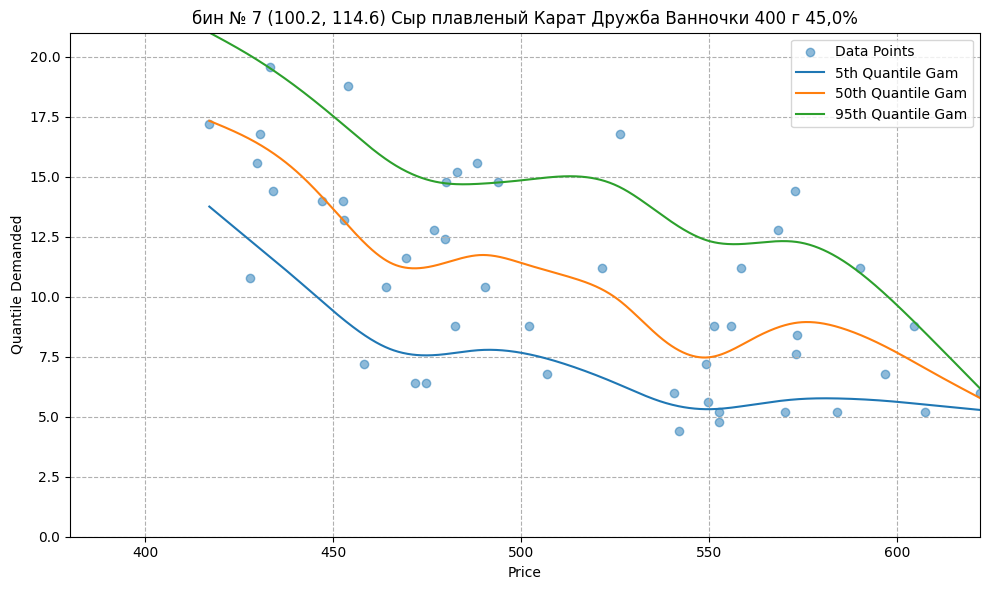

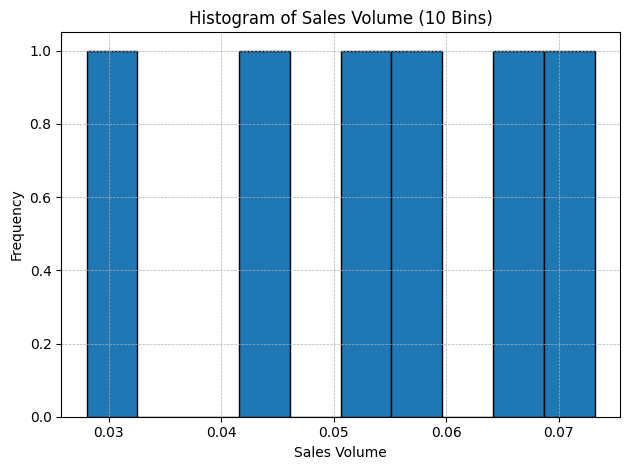

Интервалы бинов share vol 0.03707594506057413 0.05062290948779169
количево код тт 1
['J021']
did not converge


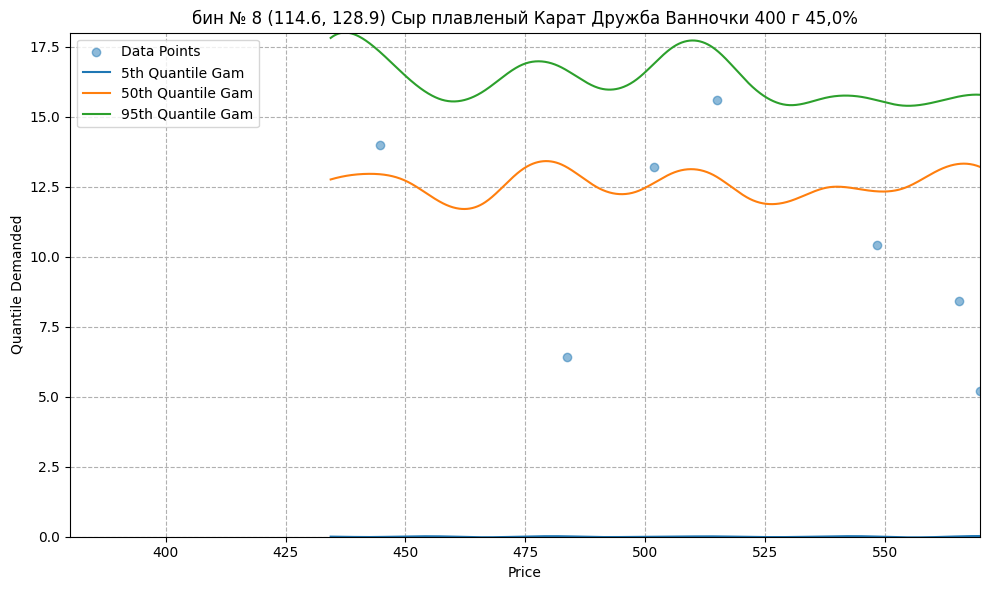

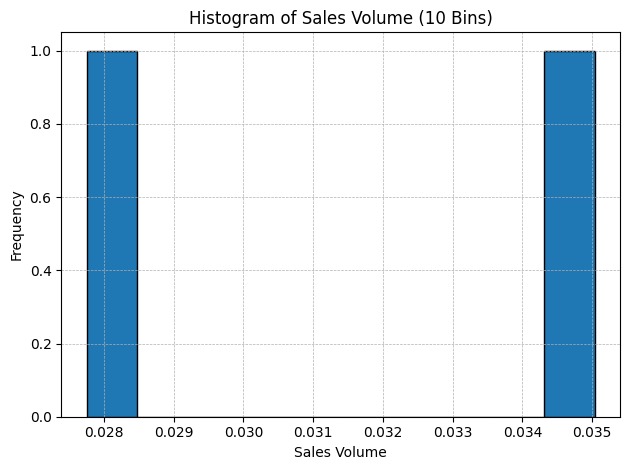

Интервалы бинов share vol 0.03357943109337466 0.03503638235481478
количево код тт 1
['J502']
did not converge


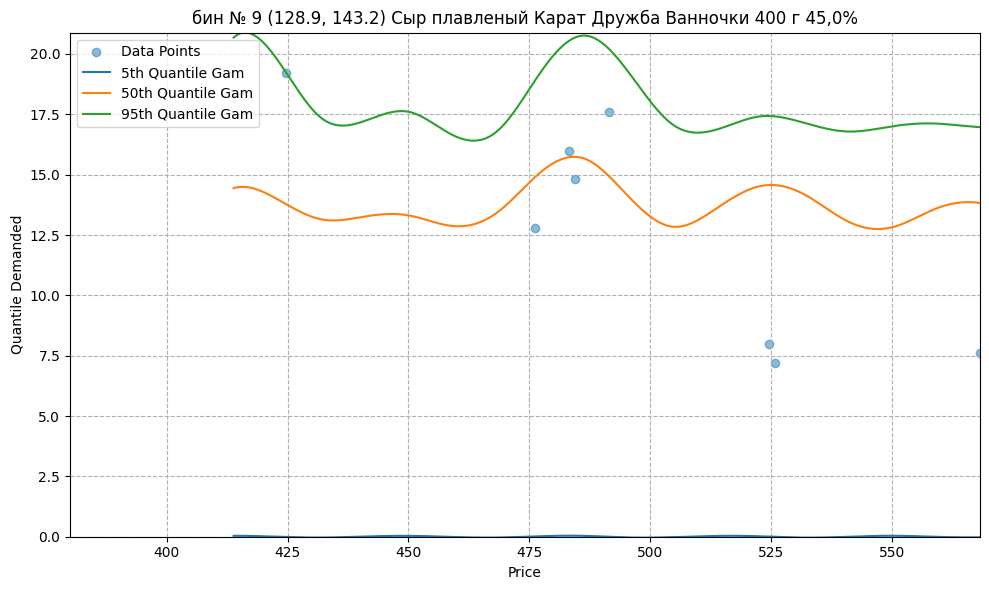

In [22]:
import random
lw = bin_edges.tolist()
for i in range(len(lw)):
  if i != len(lw)-1:
    # print('Интервалы бинов sales vol',lw[i],lw[i+1])
    merdge_df = df[(df["SALES VOL"] >= lw[i]) & (df["SALES VOL"] <= lw[i+1])]
    plt_2=plt
    counts_sh, bin_edges_sh, _ = plt_2.hist(merdge_df["SHARE VOL"], bins=10, edgecolor='black')
    plt_2.xlabel('Sales Volume')
    plt_2.ylabel('Frequency')
    plt_2.title('Histogram of Sales Volume (10 Bins)')

    # Добавляем сетку
    plt_2.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Отображаем гистограмму
    plt_2.tight_layout()
    plt.show()


    # Находим индекс бина с максимальным количеством
    # print('до',counts_sh)

    max_bin_index_sh = counts_sh.argmax()


    if  max_bin_index_sh ==0:



      # mask = np.delete(counts_sh, max_bin_index_sh)
      counts_sh[max_bin_index_sh] = 0

        # Применяем маску для создания нового массива без удаляемых элементов
      counts_sh_new = counts_sh

    else:
      counts_sh_new = counts_sh



    # print('после',counts_sh_new)
    max_bin_index_sh = counts_sh_new.argmax()
    # print('после индекс',max_bin_index_sh)

    # Находим 4 бина вправо и 4 бина влево от самого высокого бина
    # Проверяем, чтобы индексы не выходили за пределы массива
    left_index_sh = max(0, max_bin_index_sh - 1)
    right_index_sh = min(len(bin_edges_sh) - 1, max_bin_index_sh + 2)

    # Получаем границы диапазона
    bin_start_sh = bin_edges_sh[left_index_sh]
    bin_end_sh = bin_edges_sh[right_index_sh]
    print('Интервалы бинов share vol',bin_start_sh, bin_end_sh)
    plt_2.close()
    mergde_df_2= merdge_df[(merdge_df["SHARE VOL"] >= bin_start_sh) & (merdge_df["SHARE VOL"] <= bin_end_sh)]
    lst= mergde_df_2['Kod_TT'].unique().tolist()

    df_kod_TT_all = df_all[df_all['Kod_TT'].isin(lst)]

    filtered_df = df_kod_TT_all.groupby("Kod_TT").filter(lambda x: len(x) >= 5)
    print('количево код тт',len(filtered_df['Kod_TT'].unique().tolist()))


    # Получаем список уникальных значений Kod_TT
    unique_kod_tt = filtered_df['Kod_TT'].unique().tolist()

    # Случайным образом выбираем 10 значений из списка
    if len(unique_kod_tt) >=10:
      # Случайным образом выбираем 10 значений из списка
      random_kod_tt = random.sample(unique_kod_tt, 10)
    else:
      random_kod_tt = unique_kod_tt

    print(random_kod_tt)


    # lst_1= filtered_df['Kod_TT'].unique().tolist()[:10]
    filtered_df_2 = df_all[df_all['Kod_TT'].isin(random_kod_tt)]

    X = pd.DataFrame({'Price': filtered_df_2['PRICE PER UNIT'].tolist()})
    y = pd.DataFrame({'Sales': filtered_df_2['SALES VOL'].tolist()})
    quantiles = [0.05, 0.5, 0.95]
    gam_res = {}
    for q in quantiles:
        gam = ExpectileGAM(s(0), expectile=q)
        gam.fit(X, y)
        gam_res[q] = gam

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label='Data Points')
    XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

    for q, gam in gam_res.items():
        plt.plot(XX, gam.predict(XX), label=f'{int(q * 100)}th Quantile Gam')

    plt.xlim(380, XX.max())
    plt.ylim(0, gam.predict(XX).max())
    plt.xlabel('Price')
    plt.ylabel('Quantile Demanded')
    plt.title(f'бин № {i} {round(lw[i],1),round(lw[i+1],1)} Сыр плавленый Карат Дружба Ванночки 400 г 45,0%')
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.tight_layout()

    plt.show()
    plt.close()



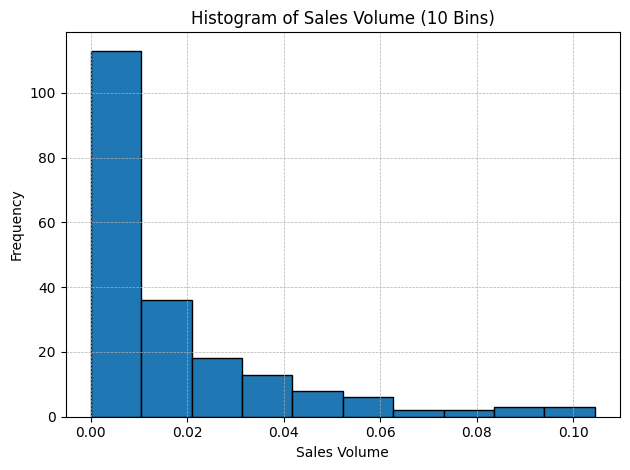

Интервалы бинов share vol 0.0 0.03132477702849684
количево код тт 22
['Q618', 'S554', '9037', 'G694', 'H959', 'G273', '4699', '37UY', '333W', '37JF']


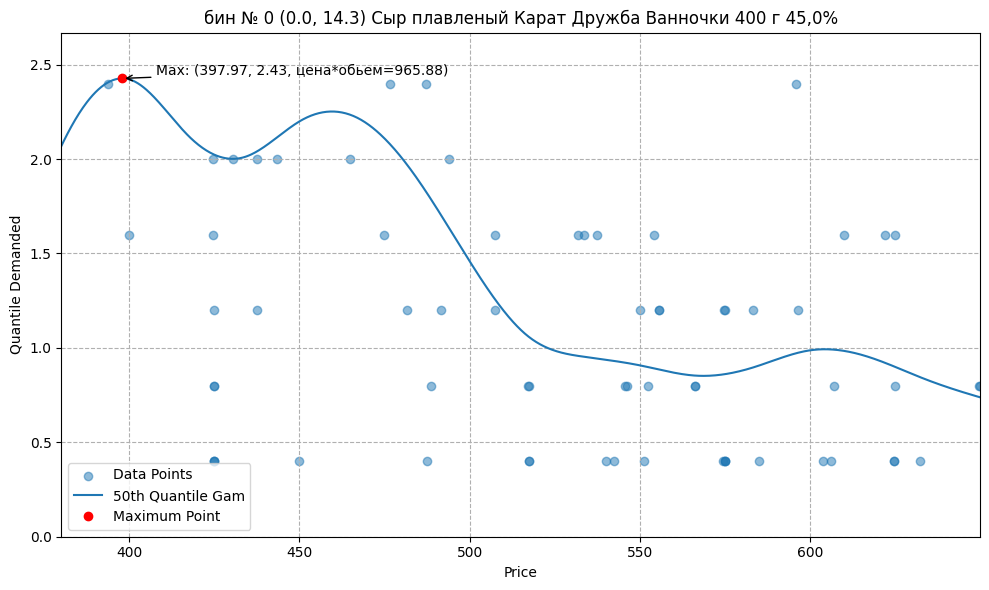

Оптимальная цена: 463.59
Максимальная выручка: 1039.36


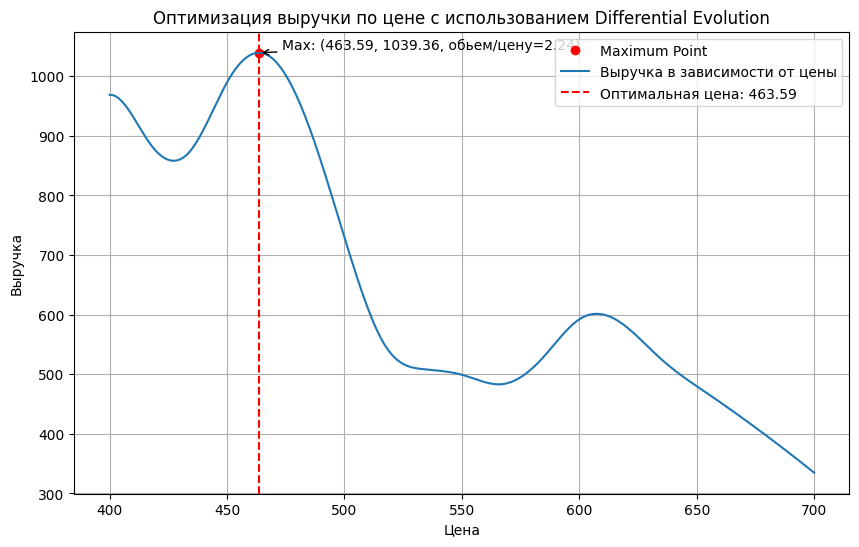

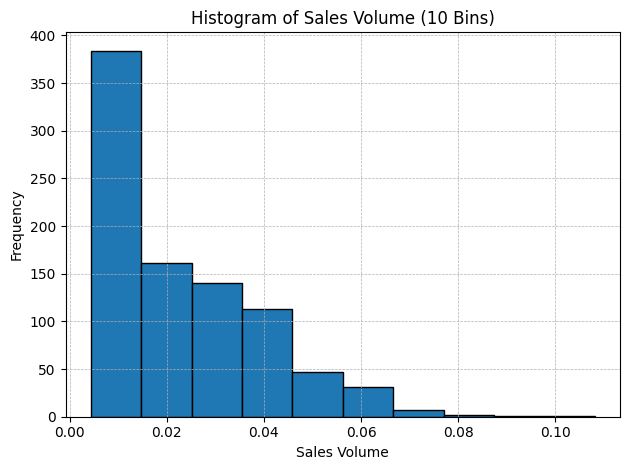

Интервалы бинов share vol 0.004381869759111805 0.03550589367440207
количево код тт 237
['34W7', 'H973', 'Q293', 'O842', '3535', '34XC', '8140', '3417', '35AT', 'Y235']


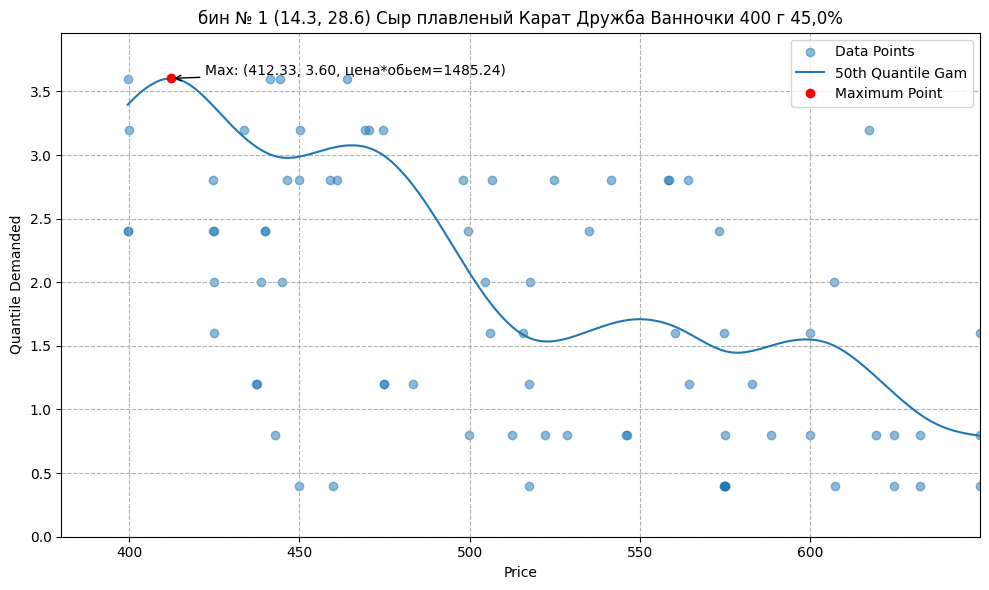

Оптимальная цена: 414.77
Максимальная выручка: 1489.55


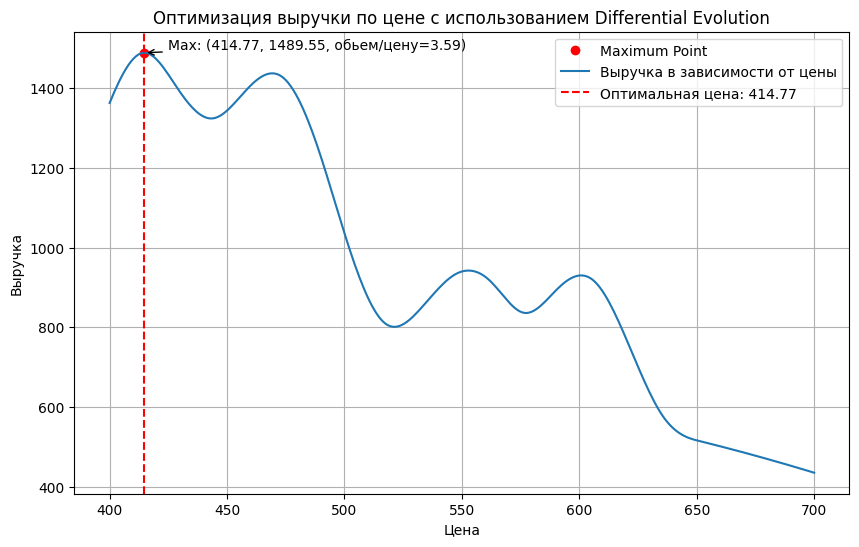

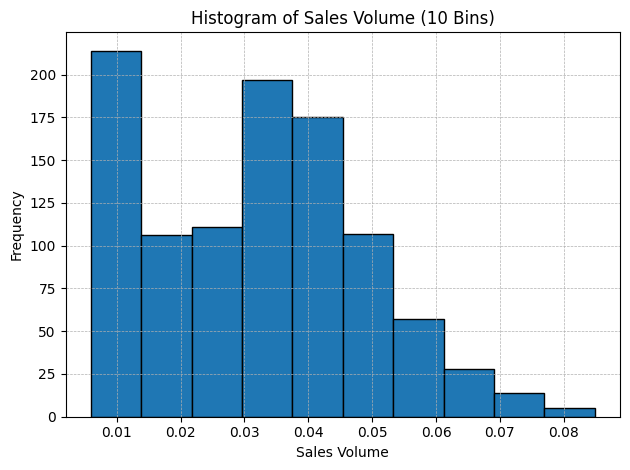

Интервалы бинов share vol 0.021735070295324288 0.04540790466704824
количево код тт 480
['329Y', 'D478', 'X961', '33SQ', '33OE', 'Y361', '3864', 'L183', '3869', '359P']


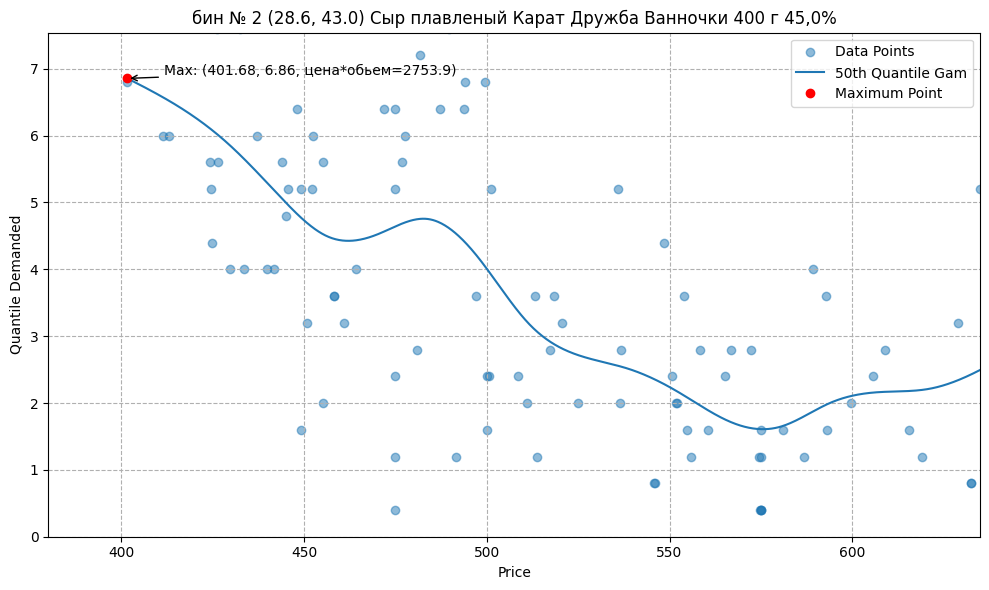

Оптимальная цена: 700.00
Максимальная выручка: 3029.38


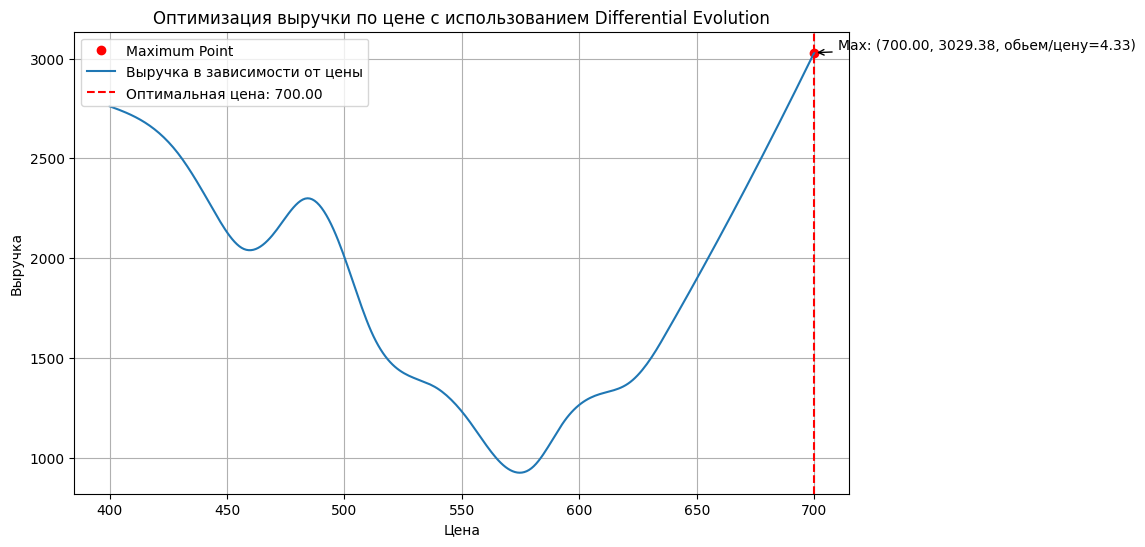

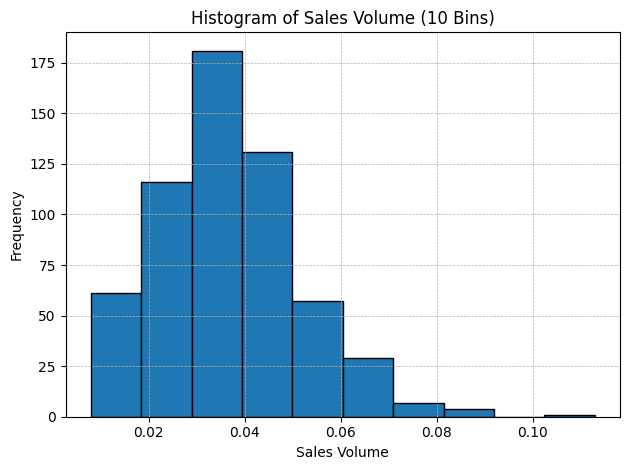

Интервалы бинов share vol 0.01847196114422682 0.04994943847578018
количево код тт 424
['Q939', '3404', '8554', 'Y578', '9548', '6584', '31DT', 'S612', '6532', '33Q1']


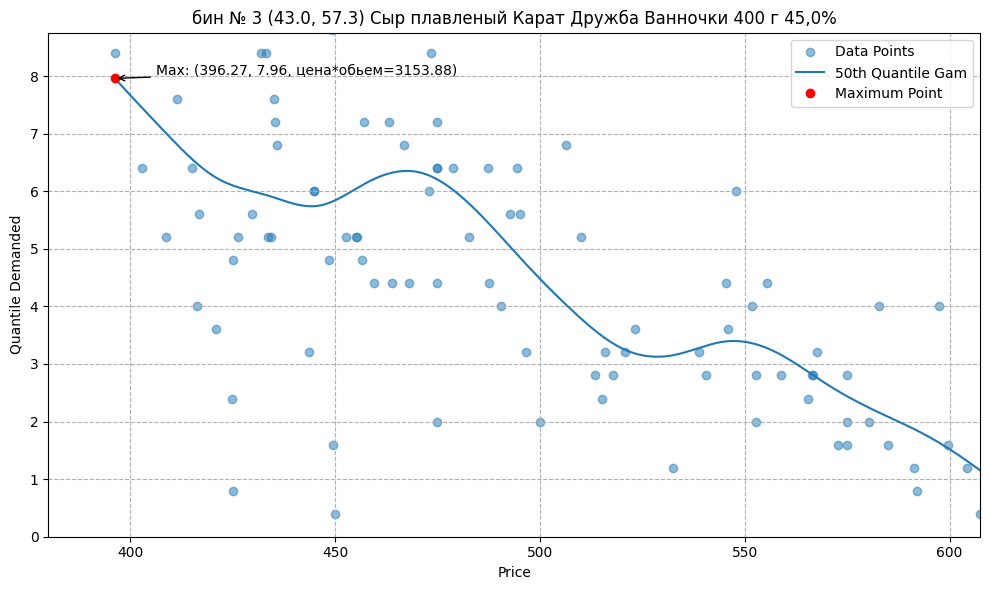

Оптимальная цена: 400.00
Максимальная выручка: 3068.30


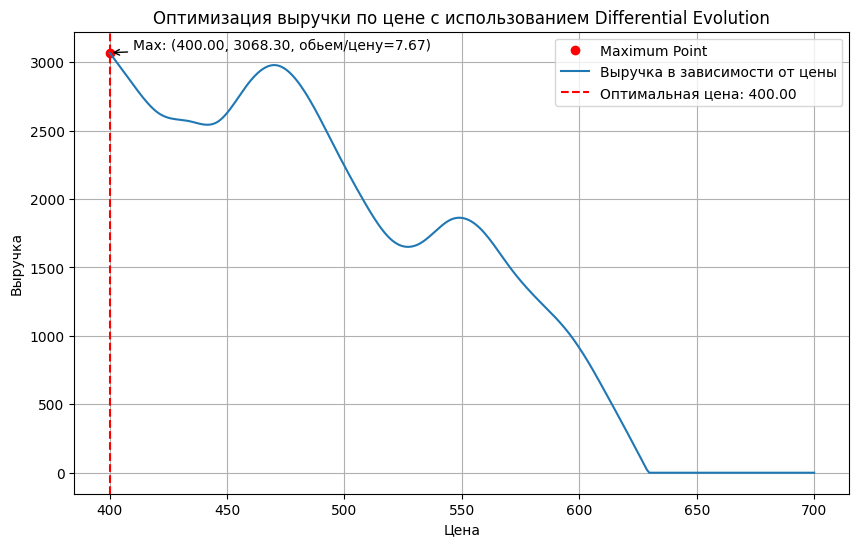

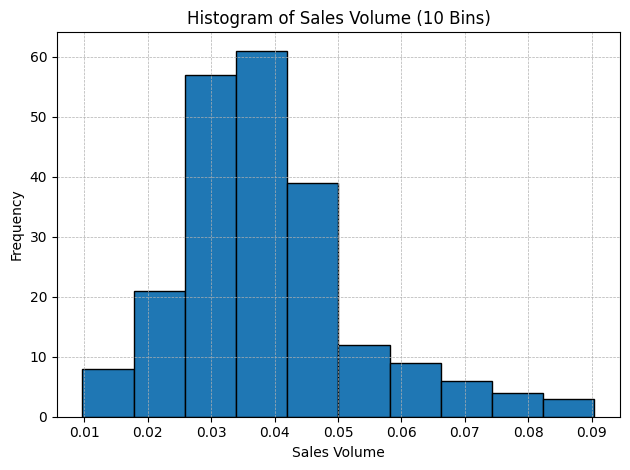

Интервалы бинов share vol 0.02586992649725122 0.0500726278748981
количево код тт 157
['X300', 'G758', 'O616', '4362', '6775', '9361', '4827', '4715', 'O873', '33F2']


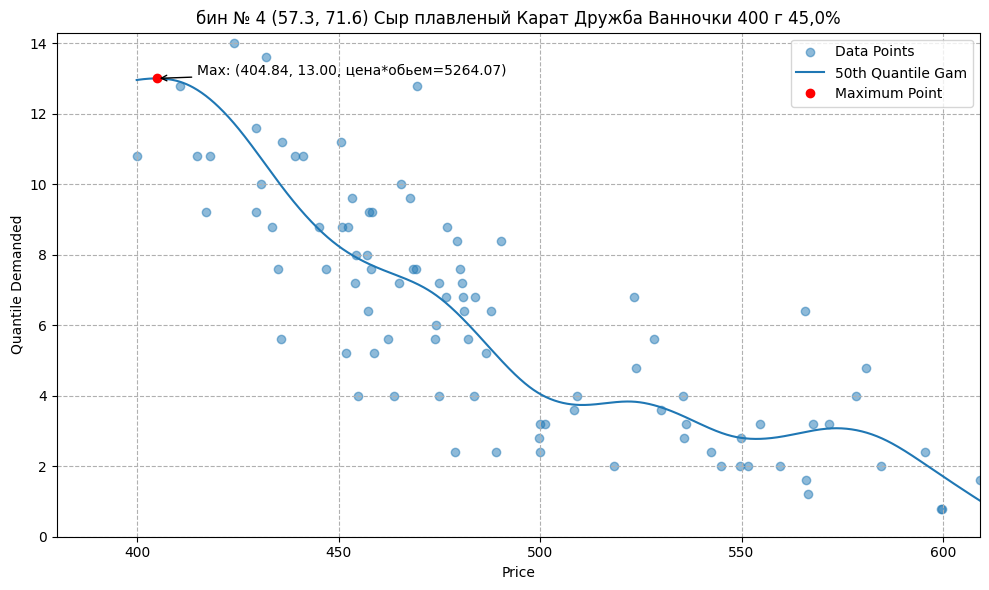

Оптимальная цена: 409.98
Максимальная выручка: 5299.67


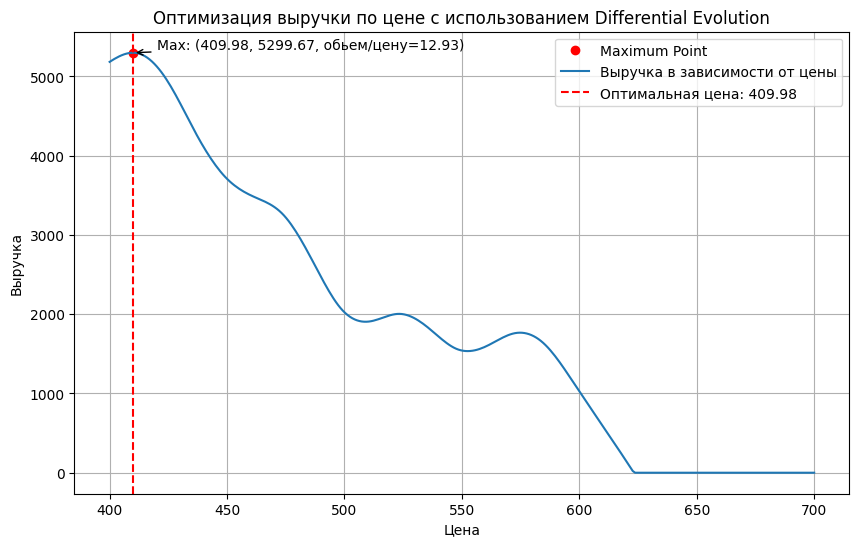

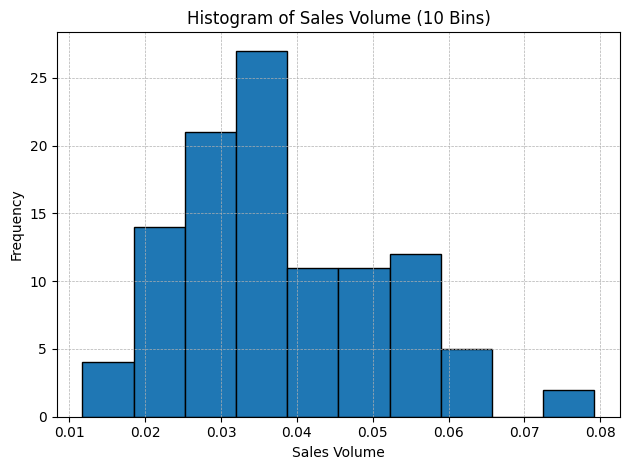

Интервалы бинов share vol 0.025222336245532086 0.045480776375343104
количево код тт 59
['4541', '4399', 'O280', 'O417', 'Y208', '9601', '8828', 'G930', 'G060', 'G153']


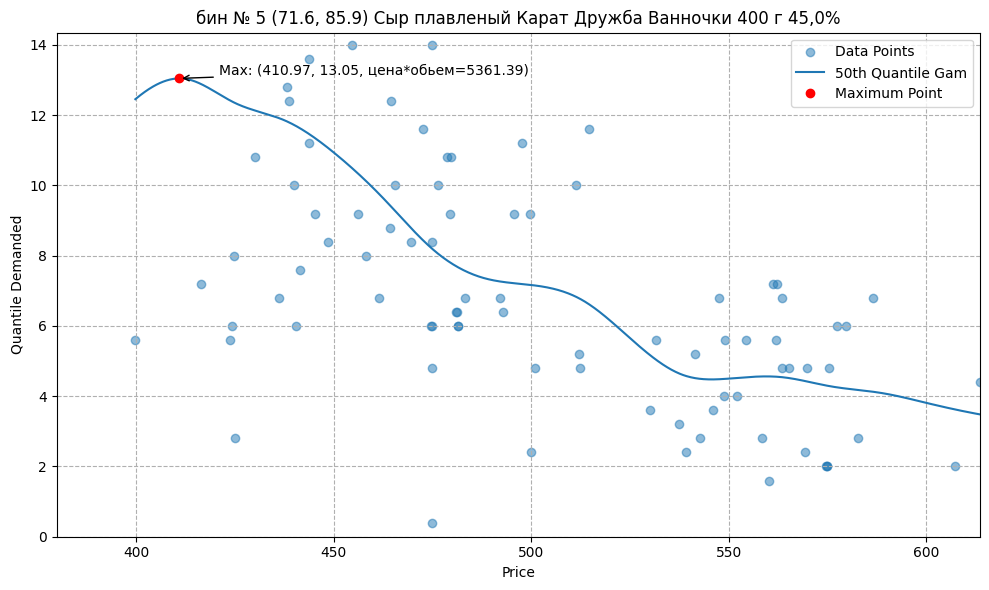

Оптимальная цена: 413.78
Максимальная выручка: 5380.00


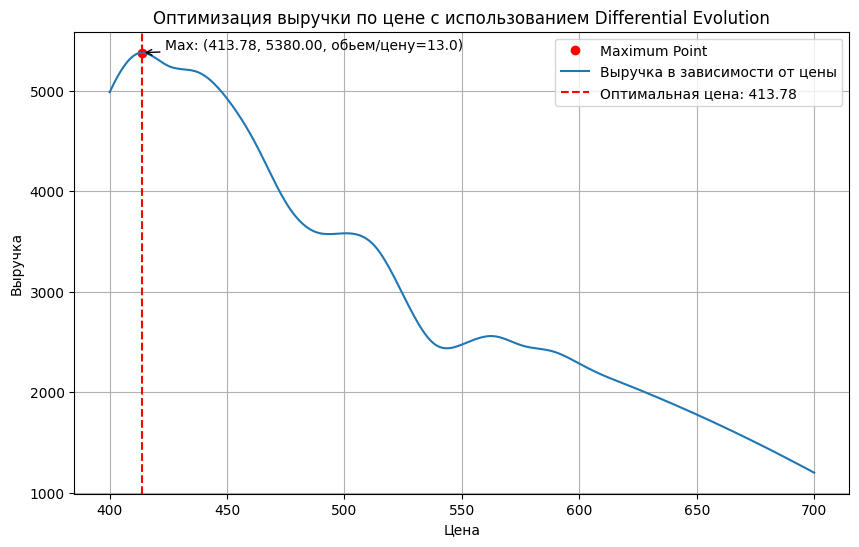

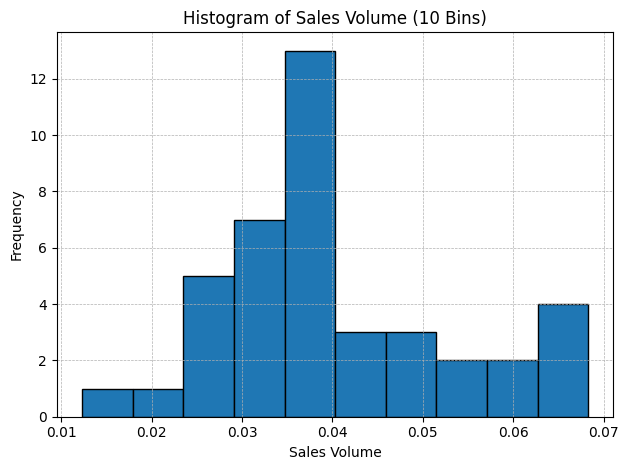

Интервалы бинов share vol 0.02910645583588618 0.04590038791595413
количево код тт 23
['7625', '9145', '345U', '4075', '5335', '9321', '4229', '9632', '8245', '9494']


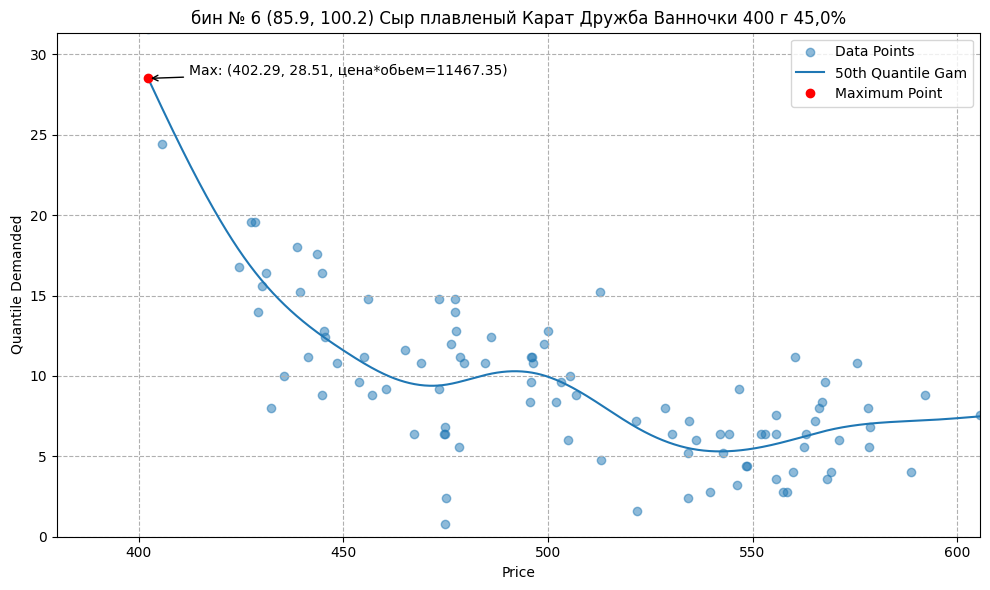

Оптимальная цена: 400.00
Максимальная выручка: 11903.47


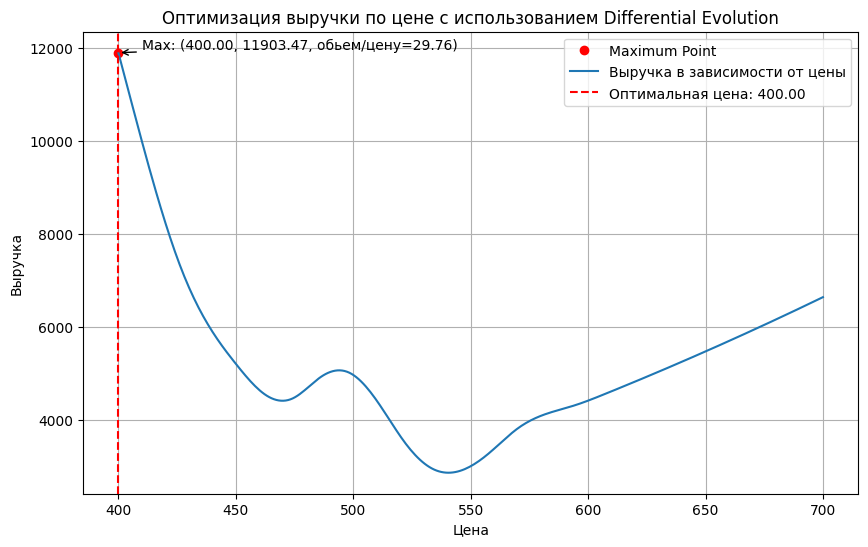

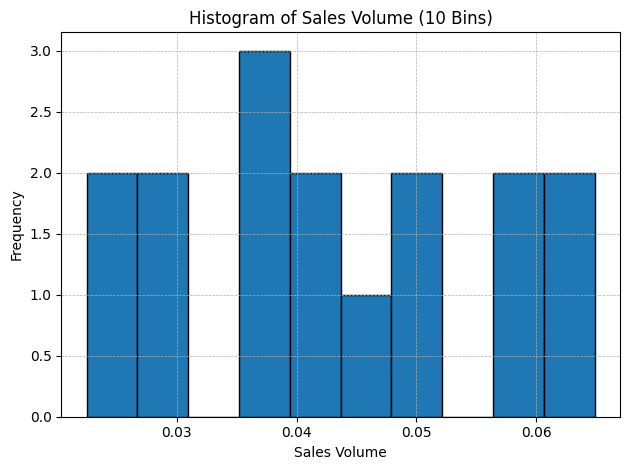

Интервалы бинов share vol 0.030969770490102595 0.04368007959569667
количево код тт 5
['3513', '3847', '8112', '9558', 'S633']


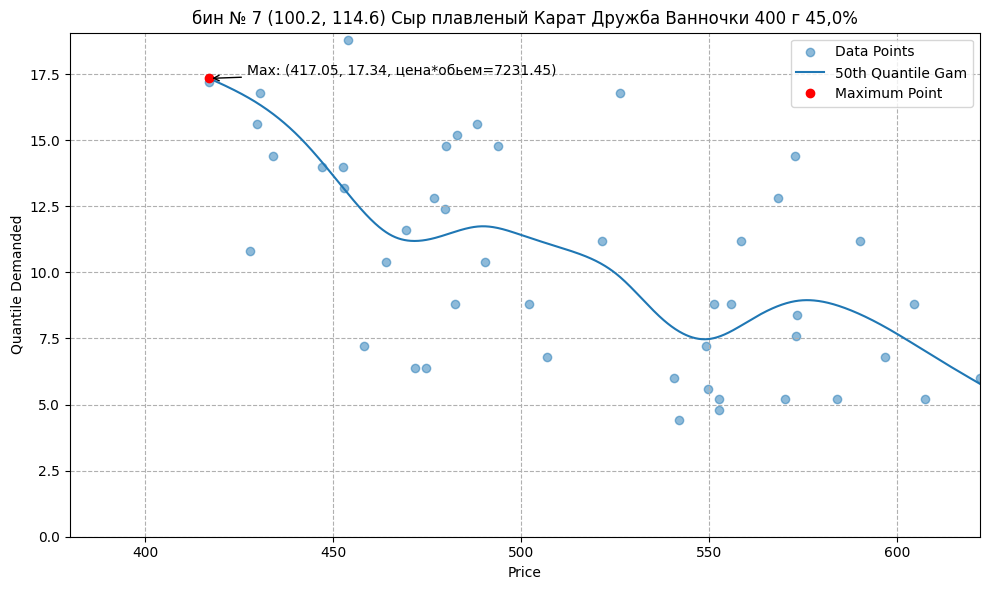

Оптимальная цена: 400.00
Максимальная выручка: 7374.45


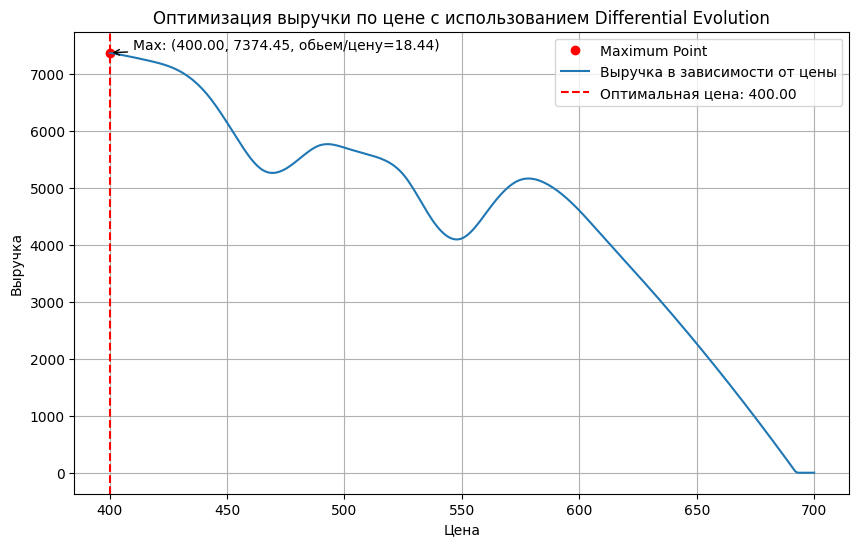

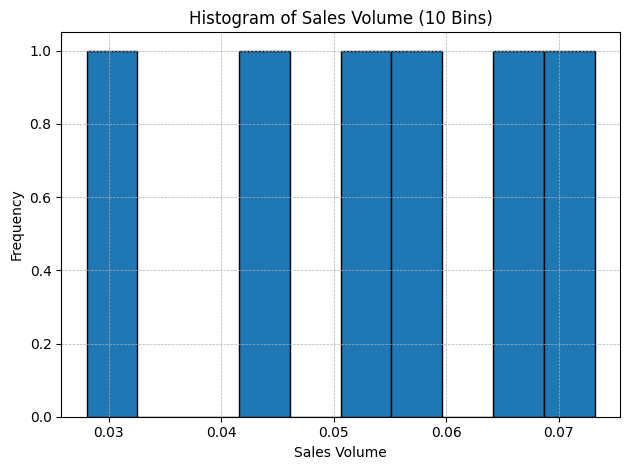

Интервалы бинов share vol 0.03707594506057413 0.05062290948779169
количево код тт 1
['J021']


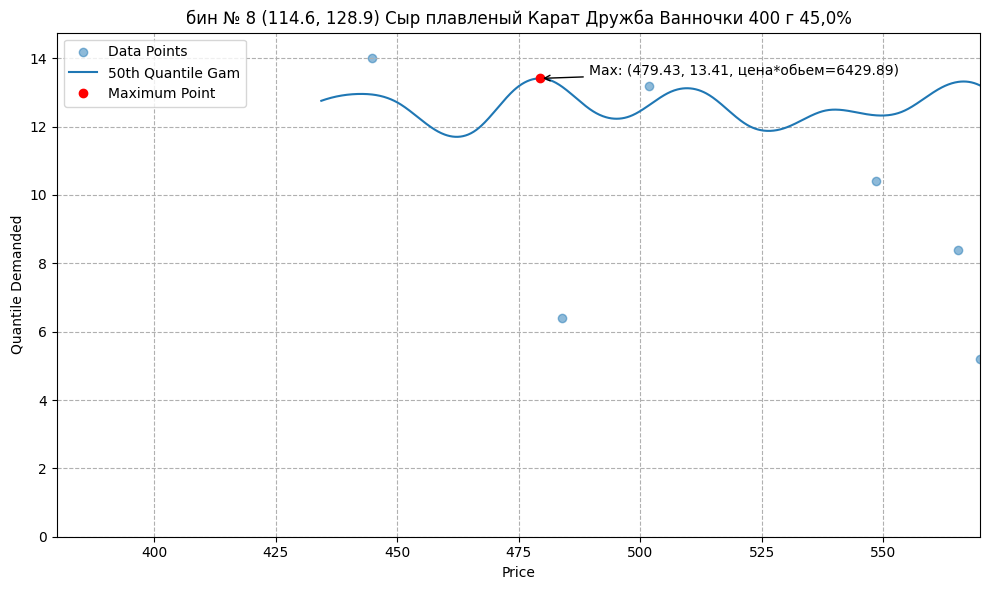

Оптимальная цена: 567.72
Максимальная выручка: 7554.67


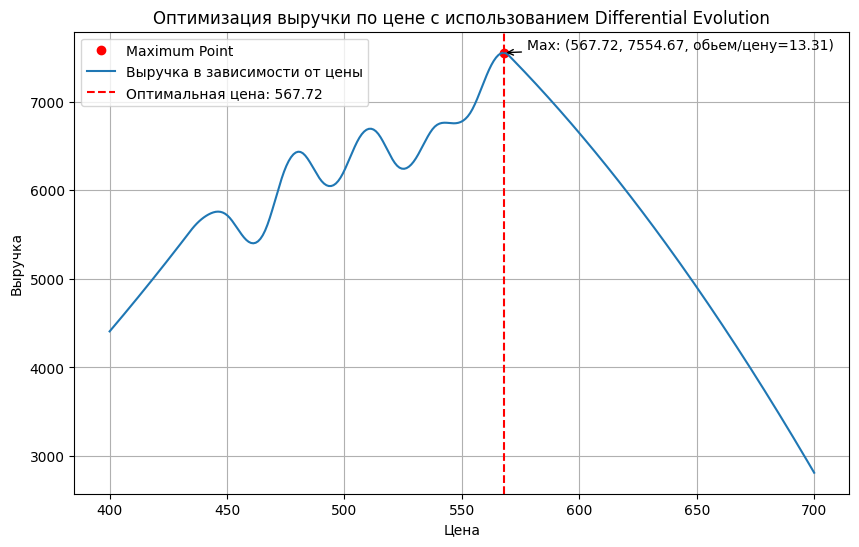

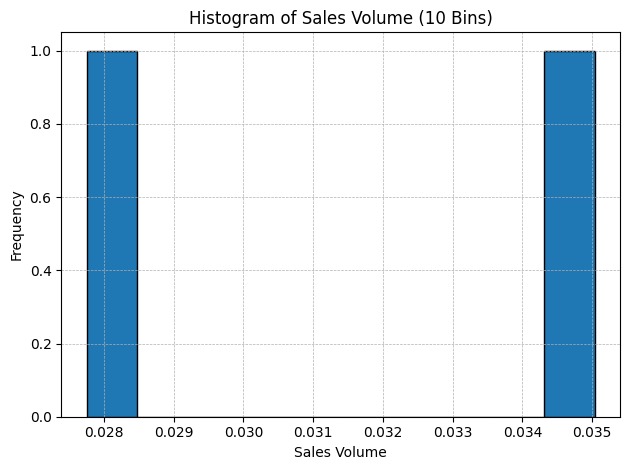

Интервалы бинов share vol 0.03357943109337466 0.03503638235481478
количево код тт 1
['J502']


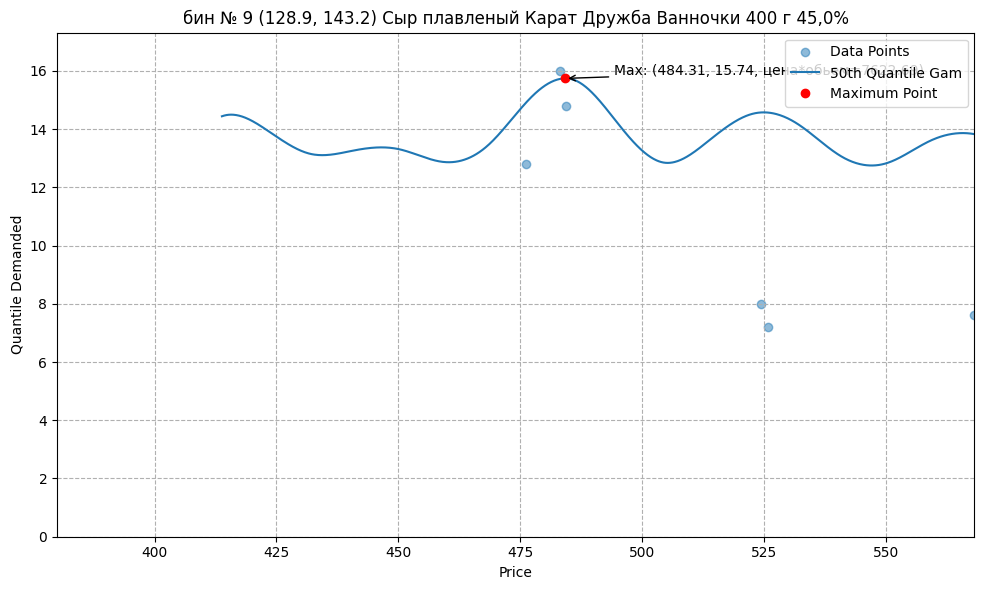

Оптимальная цена: 567.74
Максимальная выручка: 7856.53


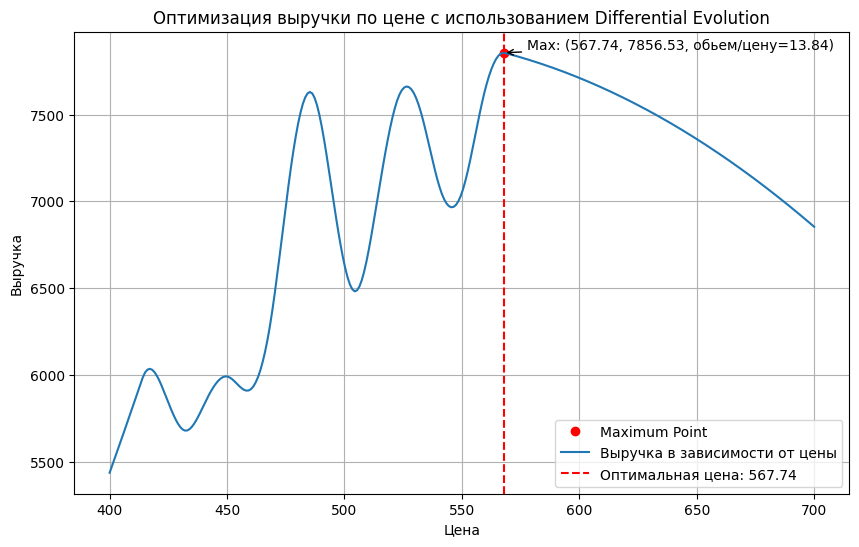

In [76]:
import random
import numpy as np
import pandas as pd
from pygam import ExpectileGAM, s
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt


np.random.seed(42)
lw = bin_edges.tolist() #[4:6]
for i in range(len(lw)):
  if i != len(lw)-1:
    # print('Интервалы бинов sales vol',lw[i],lw[i+1])
    merdge_df = df[(df["SALES VOL"] >= lw[i]) & (df["SALES VOL"] <= lw[i+1])]
    plt_2=plt
    counts_sh, bin_edges_sh, _ = plt_2.hist(merdge_df["SHARE VOL"], bins=10, edgecolor='black')
    plt_2.xlabel('Sales Volume')
    plt_2.ylabel('Frequency')
    plt_2.title('Histogram of Sales Volume (10 Bins)')

    # Добавляем сетку
    plt_2.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Отображаем гистограмму
    plt_2.tight_layout()
    plt.show()


    # Находим индекс бина с максимальным количеством
    # print('до',counts_sh)

    max_bin_index_sh = counts_sh.argmax()


    if  max_bin_index_sh ==0:



      # mask = np.delete(counts_sh, max_bin_index_sh)
      counts_sh[max_bin_index_sh] = 0

        # Применяем маску для создания нового массива без удаляемых элементов
      counts_sh_new = counts_sh

    else:
      counts_sh_new = counts_sh



    # print('после',counts_sh_new)
    max_bin_index_sh = counts_sh_new.argmax()
    # print('после индекс',max_bin_index_sh)

    # Находим 4 бина вправо и 4 бина влево от самого высокого бина
    # Проверяем, чтобы индексы не выходили за пределы массива
    left_index_sh = max(0, max_bin_index_sh - 1)
    right_index_sh = min(len(bin_edges_sh) - 1, max_bin_index_sh + 2)

    # Получаем границы диапазона
    bin_start_sh = bin_edges_sh[left_index_sh]
    bin_end_sh = bin_edges_sh[right_index_sh]
    print('Интервалы бинов share vol',bin_start_sh, bin_end_sh)
    plt_2.close()
    mergde_df_2= merdge_df[(merdge_df["SHARE VOL"] >= bin_start_sh) & (merdge_df["SHARE VOL"] <= bin_end_sh)]
    lst= mergde_df_2['Kod_TT'].unique().tolist()

    df_kod_TT_all = df_all[df_all['Kod_TT'].isin(lst)]

    filtered_df = df_kod_TT_all.groupby("Kod_TT").filter(lambda x: len(x) >= 5)
    print('количево код тт',len(filtered_df['Kod_TT'].unique().tolist()))


    # Получаем список уникальных значений Kod_TT
    unique_kod_tt = filtered_df['Kod_TT'].unique().tolist()

    # Случайным образом выбираем 10 значений из списка
    if len(unique_kod_tt) >=10:
      # Случайным образом выбираем 10 значений из списка
      random_kod_tt = random.sample(unique_kod_tt, 10)
      # random_kod_tt = ['35MH', '4362', '33GK', '30MP', '309H', '4247', 'J219', '350Z', '8980', '360I']

    else:
      random_kod_tt = unique_kod_tt

    print(random_kod_tt)


    # lst_1= filtered_df['Kod_TT'].unique().tolist()[:10]
    filtered_df_2 = df_all[df_all['Kod_TT'].isin(random_kod_tt)]



    # Предположим, что у вас есть DataFrame 'filtered_df_2' с колонками 'PRICE PER UNIT' и 'SALES VOL'
    # Загрузите или определите ваш DataFrame здесь
    # filtered_df_2 = pd.read_csv('your_data.csv')

    # Подготовка данных
    X = pd.DataFrame({'Price': filtered_df_2['PRICE PER UNIT']})
    y = filtered_df_2['SALES VOL']

    # Обучение модели GAM на 50-м квантиле
    q = 0.5
    gam = ExpectileGAM(s(0), expectile=q).fit(X, y)

    XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    plt.figure(figsize=(10, 6))
    # Отображаем исходные данные
    plt.scatter(X, y, alpha=0.5, label='Data Points')

    # Вычисляем прогнозы модели GAM
    predictions = gam.predict(XX)

    # Строим кривую модели GAM
    plt.plot(XX, predictions, label=f'{int(q * 100)}th Quantile Gam')

    # Находим максимальное значение прогноза и соответствующее значение цены
    max_pred = predictions.max()
    max_index = predictions.argmax()
    max_price = XX[max_index][0]  # XX должно быть двумерным массивом

    # Отображаем точку максимума на графике
    plt.plot(max_price, max_pred, 'ro', label='Maximum Point')

    # Добавляем аннотацию с значениями максимума
    plt.annotate(f'Max: ({max_price:.2f}, {max_pred:.2f}, цена*обьем={round(max_price*max_pred,2)})',
                xy=(max_price, max_pred),
                xytext=(max_price + 10, max_pred),
                textcoords='data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
                ha='left', va='bottom')

    # Настраиваем оси и другие параметры графика
    plt.xlim(380, XX.max())
    plt.ylim(0, predictions.max() * 1.1)  # Добавим немного пространства сверху
    plt.xlabel('Price')
    plt.ylabel('Quantile Demanded')
    plt.title(f'бин № {i} {round(lw[i],1),round(lw[i+1],1)} Сыр плавленый Карат Дружба Ванночки 400 г 45,0%')
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.tight_layout()

    plt.show()
    plt.close()

    # Определение функции выручки
    def revenue(price):

        # Преобразуем price в массив numpy, если это необходимо
        price = np.atleast_1d(price)
        # Преобразуем price в форму (n_samples, n_features)
        price_reshaped = price.reshape(-1, 1)

        # Получаем прогнозы продаж
        sales_pred = gam.predict(price_reshaped)

        # Убедимся, что прогнозируемый объем продаж не отрицательный
        sales_pred = np.maximum(sales_pred, 0)
        # Вычисляем выручку
        revenue = -price * sales_pred  # Отрицательное значение для минимизации
        # Возвращаем скалярное значение
        return revenue[0]

    # Определение границ для оптимизации
    bounds = [(400, 700)]  # Границы должны быть списком кортежей

    # Оптимизация цены с использованием differential_evolution
    result = differential_evolution(
        func=revenue,
        bounds=bounds,
        strategy='best1bin',
        maxiter=1000,
        popsize=15,
        tol=1e-6,
        mutation=(0.5, 1),
        recombination=0.7,
        seed=None,
        callback=None,
        disp=False,
        polish=True,
        init='latinhypercube'
    )

    optimal_price = result.x[0]
    max_revenue = -result.fun

    print(f"Оптимальная цена: {optimal_price:.2f}")
    print(f"Максимальная выручка: {max_revenue:.2f}")

    # Визуализация результатов
    prices = np.linspace(400, 700, 300)
    prices_reshaped = prices.reshape(-1, 1)
    sales_preds = gam.predict(prices_reshaped)
    sales_preds = np.maximum(sales_preds, 0)
    revenues = prices * sales_preds


    plt.figure(figsize=(10, 6))

     # Отображаем точку максимума на графике
    plt.plot(optimal_price, max_revenue, 'ro', label='Maximum Point')

    # Добавляем аннотацию с значениями максимума
    plt.annotate(f'Max: ({optimal_price:.2f}, {max_revenue:.2f}, обьем/цену={round(max_revenue/optimal_price,2)})',
                xy=(optimal_price, max_revenue),
                xytext=(optimal_price + 10, max_revenue),
                textcoords='data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
                ha='left', va='bottom')


    plt.plot(prices, revenues, label='Выручка в зависимости от цены')
    plt.axvline(optimal_price, color='r', linestyle='--', label=f'Оптимальная цена: {optimal_price:.2f}')
    plt.xlabel('Цена')
    plt.ylabel('Выручка')
    plt.title('Оптимизация выручки по цене с использованием Differential Evolution')
    plt.legend()
    plt.grid(True)
    plt.show()
